## Exploring Waste Management dataset

1. Univariate Analysis
2. Bi-variate
3. Multivariate
4. Insight Summary


#### About the Dataset
    Area : Florida
    Name: Collier County
    Date Range: 88 Days (from 24th Dec 2018 to 22nd Mar 2019)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

sns.set(font_scale=1.5)
%matplotlib inline

In [3]:
data = pd.read_csv("mock_data_wm.csv", parse_dates=["CONTAINER_DATE", "CONTAINER_DONE"])

In [4]:
df = data.copy() # copy of data

In [5]:
days = (df["CONTAINER_DONE"].max() - df["CONTAINER_DONE"].min()).days
print(f"Number of days worth of service in dataset : {days}")

Number of days worth of service in dataset : 88


In [6]:
df.head()

,ROUTE_ID,TRUCK_ID,LOB,SUBLOB,CONTAINER_DATE,LATITUDE,LONGITUDE,CONTAINER_DONE,CUSTOMER_UNIQUEID,ZIPCODE,CONTAINER_SIZE,QUANTITY,EVENT,SERVICE_STATUS,HOC,HOC_REASON,HOC_REASON_CODE,CONTSERIAL
0,1,1,COMMERCIAL,Frontload,2019-03-20,26.134610,-81.719820,2019-03-20 12:51:05,24106402003,2269000,-1,1.0,DONE,POS,NO,Not Applicable,Not Applicable,1375
1,2,1,COMMERCIAL,Frontload,2019-03-11,26.180647,-81.705920,2019-03-11 12:13:08,24111442005,676000,-1,1.0,DONE,POS,NO,Not Applicable,Not Applicable,1542
2,3,2,COMMERCIAL,Recycling,2019-01-02,26.155766,-81.676450,2019-01-02 05:52:08,128454652009,3206000,-1,1.0,POS,POS,NO,Not Applicable,Not Applicable,2838
3,3,2,COMMERCIAL,Recycling,2019-03-13,26.155591,-81.677403,2019-03-13 05:38:06,128454652009,3206000,-1,1.0,POS,POS,NO,Not Applicable,Not Applicable,2838
4,3,2,COMMERCIAL,Recycling,2019-03-13,26.155591,-81.677403,2019-03-13 05:40:29,128454652009,3206000,-1,1.0,POS,POS,NO,Not Applicable,Not Applicable,2838


### Univariate Analysis

#### Categorical Columns  

COMMERCIAL     0.986735
RESIDENTIAL    0.013265
Name: LOB, dtype: float64
Frontload    0.841693
Recycling    0.138895
Delivery     0.019411
Name: SUBLOB, dtype: float64
-1           0.993808
2 YD3        0.001746
4 YD3        0.001499
8 YD3        0.001359
96 GAL       0.000825
6 YD3        0.000449
.5 YD3       0.000192
4 LBS/YD3    0.000052
8 LBS/YD3    0.000041
6 LBS/YD3    0.000017
2 LBS/YD3    0.000012
Name: CONTAINER_SIZE, dtype: float64
POS     0.630334
DONE    0.365724
DHC     0.003942
Name: EVENT, dtype: float64
POS    0.983682
NEG    0.016318
Name: SERVICE_STATUS, dtype: float64
NO     0.931697
YES    0.068303
Name: HOC, dtype: float64
Not Applicable                          0.930420
Overloaded / Exceeded Limit             0.043595
Material Contaminated / Unacceptable    0.017493
Blocked                                 0.003087
Material on Ground                      0.002120
Closed (Holiday)                        0.001108
Suspended Service                       0.000671
Not

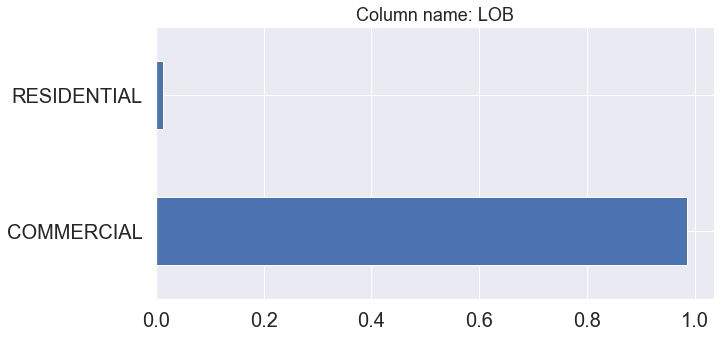

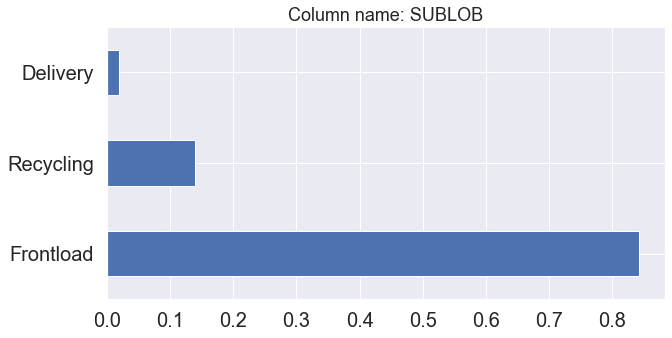

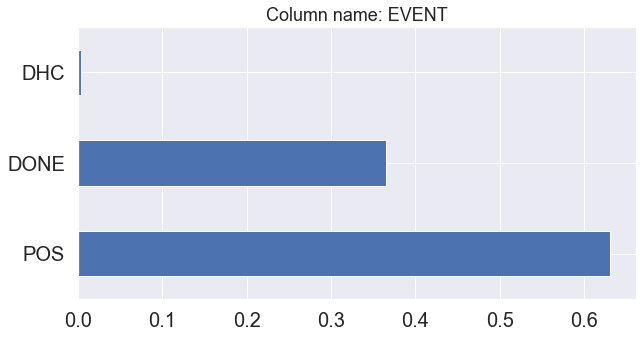

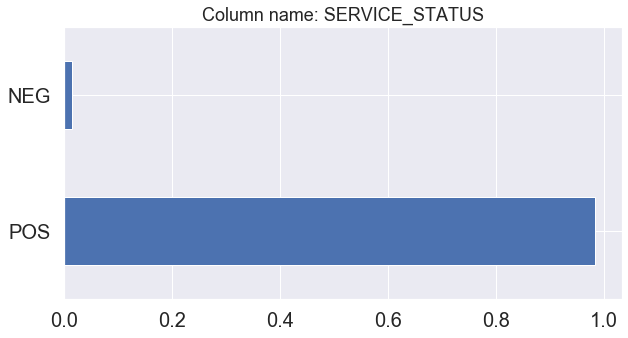

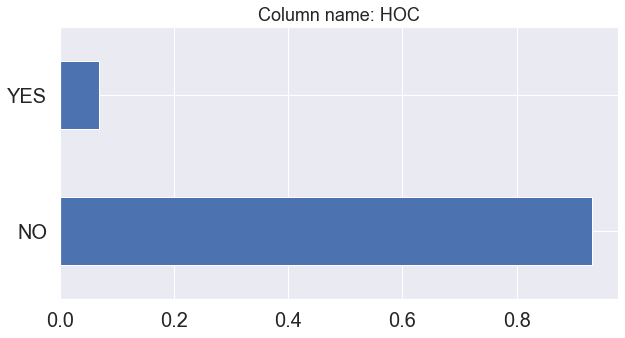

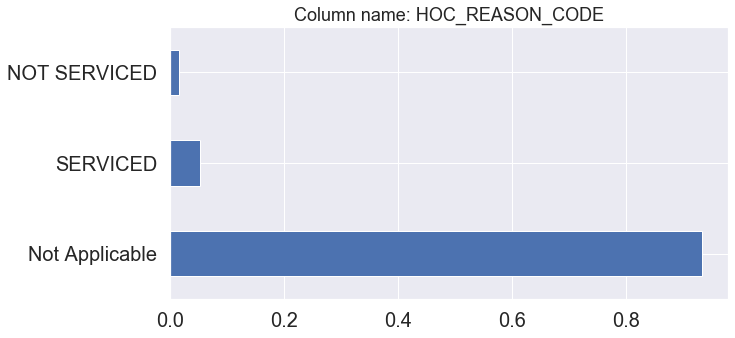

In [51]:
for column in df.select_dtypes("object").columns: # bar plots on categorical data
    vc = df[column].value_counts(normalize=True)
    print(vc)
    if vc.count() > 1 and vc.count() < 5:
        plt.figure()
        vc.plot.barh(figsize=(10, 5), fontsize=20)
        plt.title(f"Column name: {column}")

In [8]:
container_count = df["CONTSERIAL"].dropna().drop_duplicates().count()
print(f"Number of containers in the area: {container_count}")

Number of containers in the area: 9659


#### QUANTITY COLUMN

In [27]:
qty_ts = df[["QUANTITY", "CONTAINER_DATE"]].copy()
print (qty_ts.head())
qty_ts.sort_values(by="CONTAINER_DATE", inplace=True)
qty_ts.set_index("CONTAINER_DATE", inplace=True)
qty_ts = pd.pivot_table(qty_ts, values=["QUANTITY"], index=["CONTAINER_DATE"], aggfunc="sum")#.plot(figsize=(20,10))
print (qty_ts.head())


   QUANTITY CONTAINER_DATE
0       1.0     2019-03-20
1       1.0     2019-03-11
2       1.0     2019-01-02
3       1.0     2019-03-13
4       1.0     2019-03-13
                QUANTITY
CONTAINER_DATE          
2018-12-24        6201.0
2018-12-26        6770.0
2018-12-27        6363.0
2018-12-28        5989.0
2018-12-29        1554.0


In [10]:
print(f"Total quantity served : {int(qty_ts.sum().values[0])}")

Total quantity served : 346427


In [11]:
print(f"Total days served : {qty_ts.count().values[0]}")

Total days served : 76


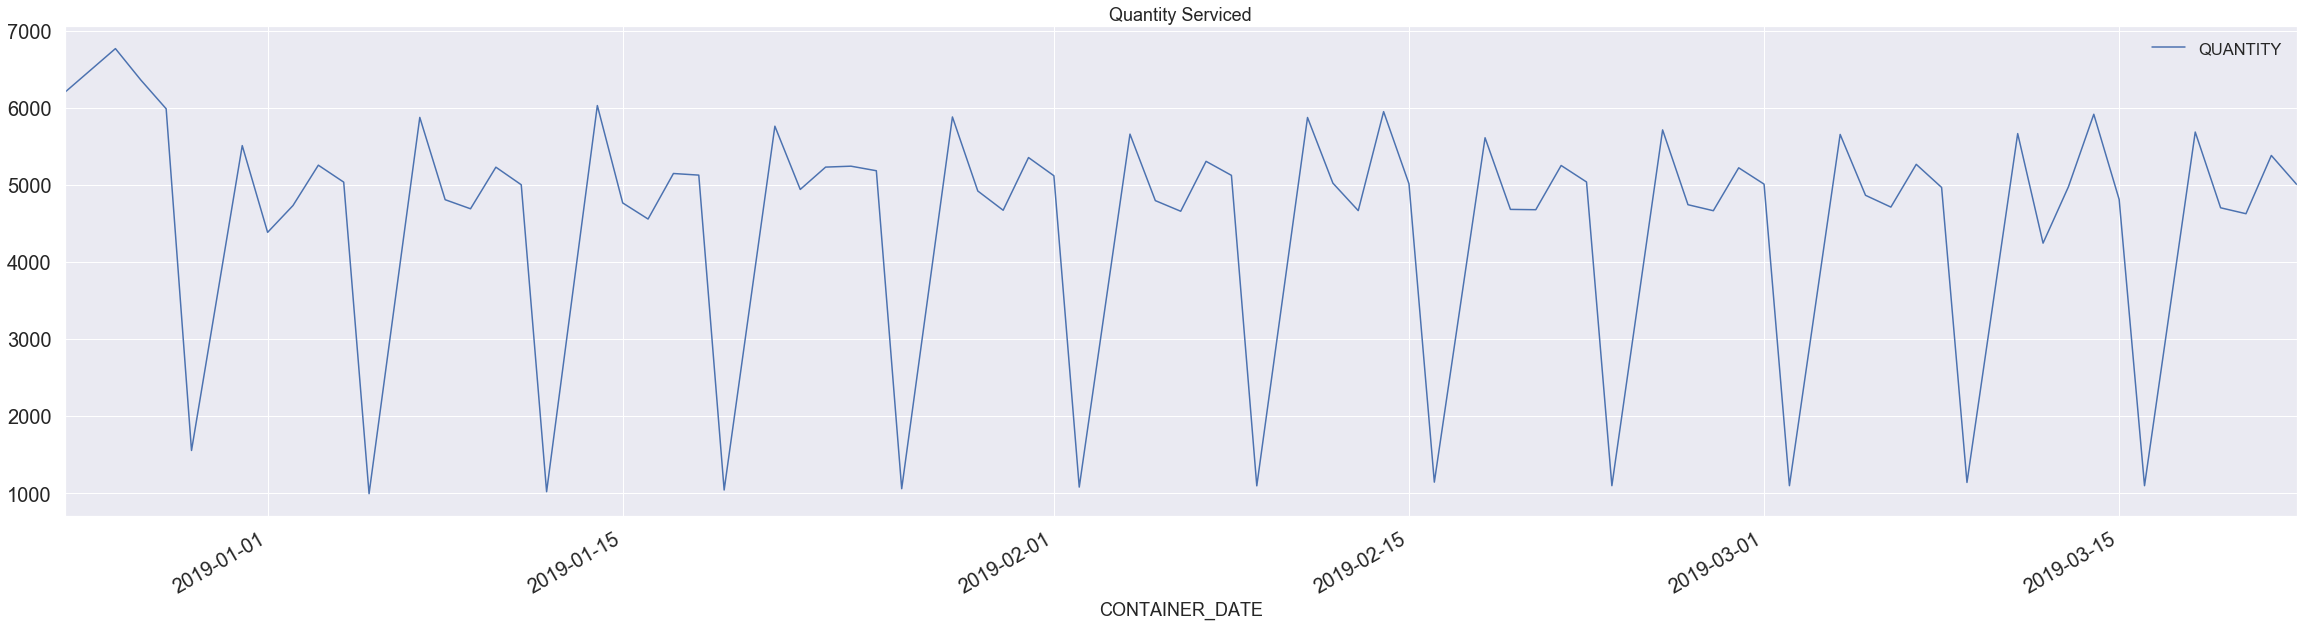

In [12]:
qty_ts.plot(kind="line", figsize=(40, 10), title="Quantity Serviced", fontsize=20)

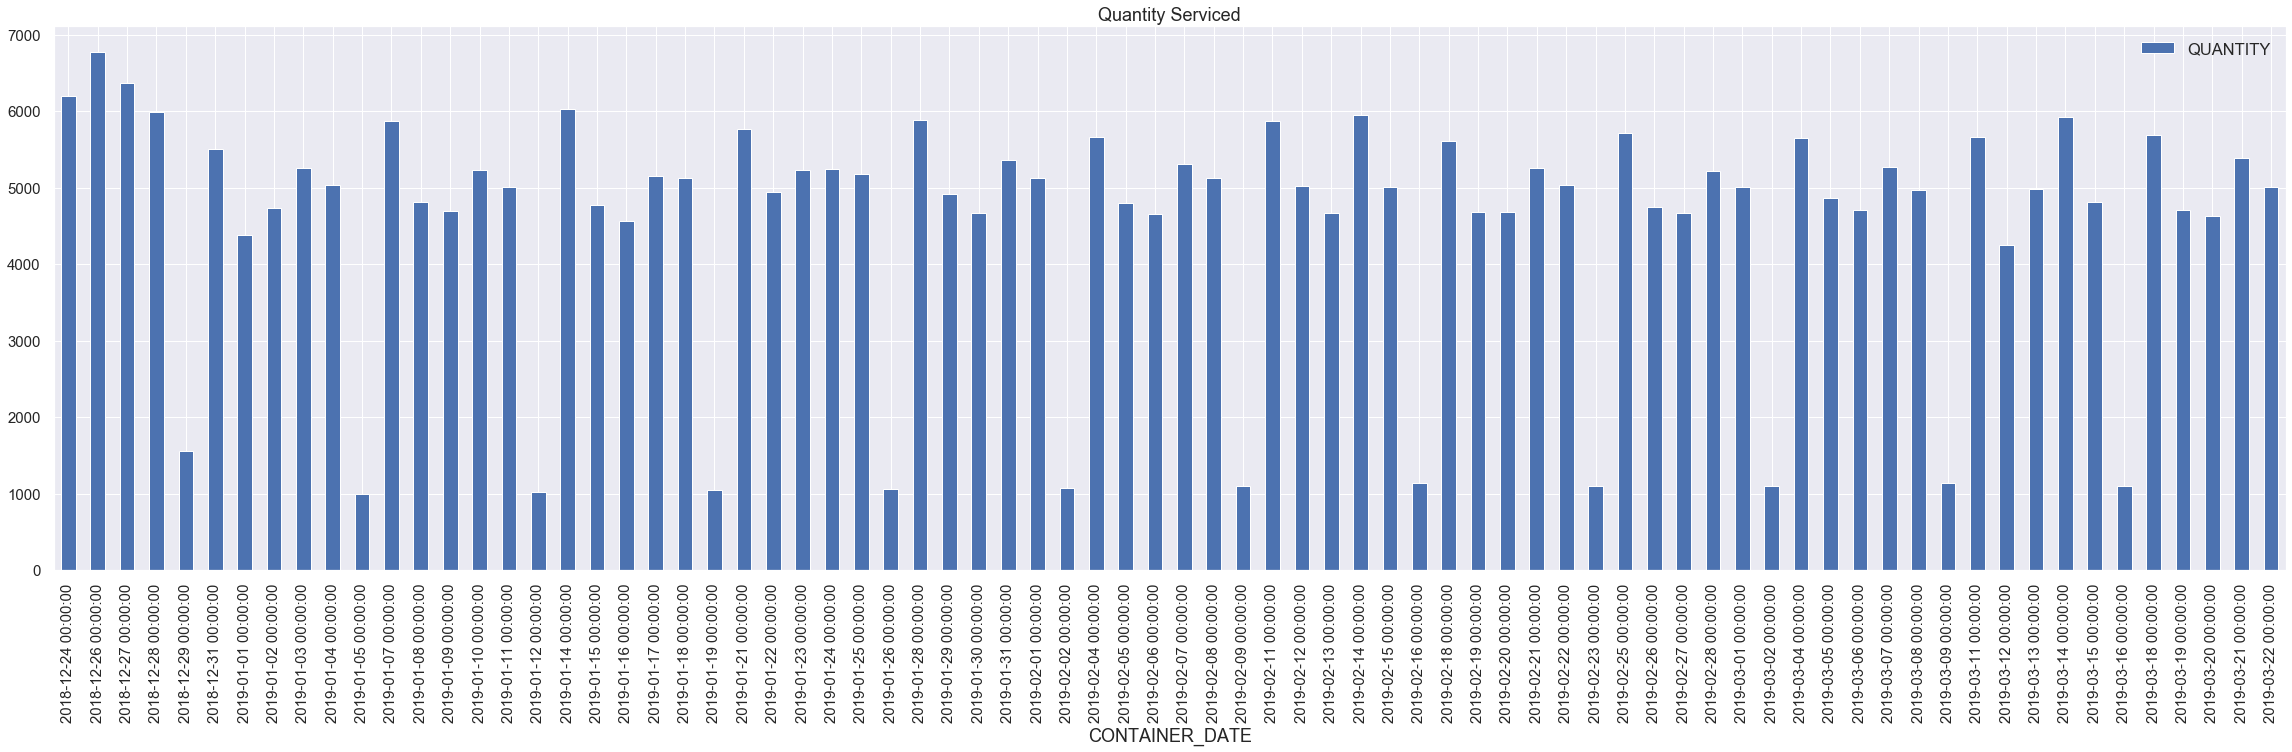

In [13]:
qty_ts.plot(kind="bar", figsize=(40, 10), title="Quantity Serviced", fontsize=15)

*Observation: Clear signs of seasonal trend (weekly) in Quantity*

### Bi-variate Analysis 

#### SUBLOB vs EVENT 

Delivery
     ROUTE_ID  TRUCK_ID          LOB    SUBLOB CONTAINER_DATE   LATITUDE  \
23         19        12  RESIDENTIAL  Delivery     2019-01-08  26.267160   
197        19        12  RESIDENTIAL  Delivery     2019-01-25  26.286177   
357        19        12  RESIDENTIAL  Delivery     2019-01-26  26.194304   
362        80        20  RESIDENTIAL  Delivery     2019-03-15  26.261518   
477        19        12  RESIDENTIAL  Delivery     2019-02-06  26.170895   

     LONGITUDE      CONTAINER_DONE  CUSTOMER_UNIQUEID  ZIPCODE CONTAINER_SIZE  \
23   -81.53749 2019-01-08 10:33:21        24768112001  4708000             -1   
197  -81.72032 2019-01-25 12:06:17        24785302005  4063000             -1   
357  -81.67993 2019-01-26 05:32:53        24598382005  3665000             -1   
362  -81.76906 2019-03-15 05:27:45        24147892004  1655000             -1   
477  -81.70007 2019-02-06 10:40:45        24745242002  3656000             -1   

     QUANTITY EVENT SERVICE_STATUS HOC      HOC

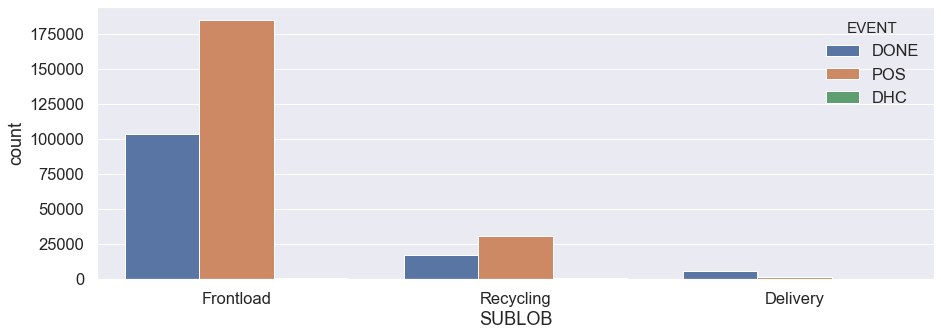

In [39]:
plt.figure(figsize=(15,5))
#print(df.head())
for w,v in df.groupby('SUBLOB'):
    print(w)
    for xx in v.EVENT.unique():
        data_f = v[v["EVENT"] == xx]
        print(data_f.head())
        print('###############################################################')
        
# dff = df.groupby('EVENT')['SUBLOB'].nunique()
# print(dff)
sns.countplot(x="SUBLOB", hue="EVENT", data=df)

### SERVICE_STATUS vs SUBLOB

   ROUTE_ID  TRUCK_ID         LOB     SUBLOB CONTAINER_DATE   LATITUDE  \
0         1         1  COMMERCIAL  Frontload     2019-03-20  26.134610   
1         2         1  COMMERCIAL  Frontload     2019-03-11  26.180647   
2         3         2  COMMERCIAL  Recycling     2019-01-02  26.155766   
3         3         2  COMMERCIAL  Recycling     2019-03-13  26.155591   
4         3         2  COMMERCIAL  Recycling     2019-03-13  26.155591   

   LONGITUDE      CONTAINER_DONE  CUSTOMER_UNIQUEID  ZIPCODE CONTAINER_SIZE  \
0 -81.719820 2019-03-20 12:51:05        24106402003  2269000             -1   
1 -81.705920 2019-03-11 12:13:08        24111442005   676000             -1   
2 -81.676450 2019-01-02 05:52:08       128454652009  3206000             -1   
3 -81.677403 2019-03-13 05:38:06       128454652009  3206000             -1   
4 -81.677403 2019-03-13 05:40:29       128454652009  3206000             -1   

   QUANTITY EVENT SERVICE_STATUS HOC      HOC_REASON HOC_REASON_CODE  \
0       

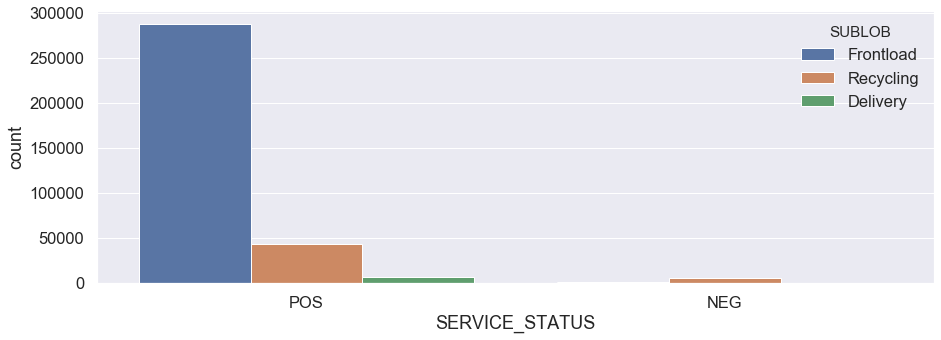

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(x="SERVICE_STATUS", hue="SUBLOB", data=df)
print(data.head())

#### Top 10 Customers serviced interms of Trash/Waste Quantity

   CUSTOMER_UNIQUEID  QUANTITY
0        24106582005   10820.0
1        24095162008    4828.0
2        24091012009    4264.0
3        24103022000    3276.0
4       117878662000    3256.0
5        24088612009    2836.0
6        24131142006    2504.0
7        24100552004    2440.0
8        24099662005    2214.0
9       131317122005    2130.0
   ROUTE_ID  TRUCK_ID         LOB     SUBLOB CONTAINER_DATE   LATITUDE  \
0         1         1  COMMERCIAL  Frontload     2019-03-20  26.134610   
1         2         1  COMMERCIAL  Frontload     2019-03-11  26.180647   
2         3         2  COMMERCIAL  Recycling     2019-01-02  26.155766   
3         3         2  COMMERCIAL  Recycling     2019-03-13  26.155591   
4         3         2  COMMERCIAL  Recycling     2019-03-13  26.155591   

   LONGITUDE      CONTAINER_DONE  CUSTOMER_UNIQUEID  ZIPCODE CONTAINER_SIZE  \
0 -81.719820 2019-03-20 12:51:05        24106402003  2269000             -1   
1 -81.705920 2019-03-11 12:13:08        24111442005   67

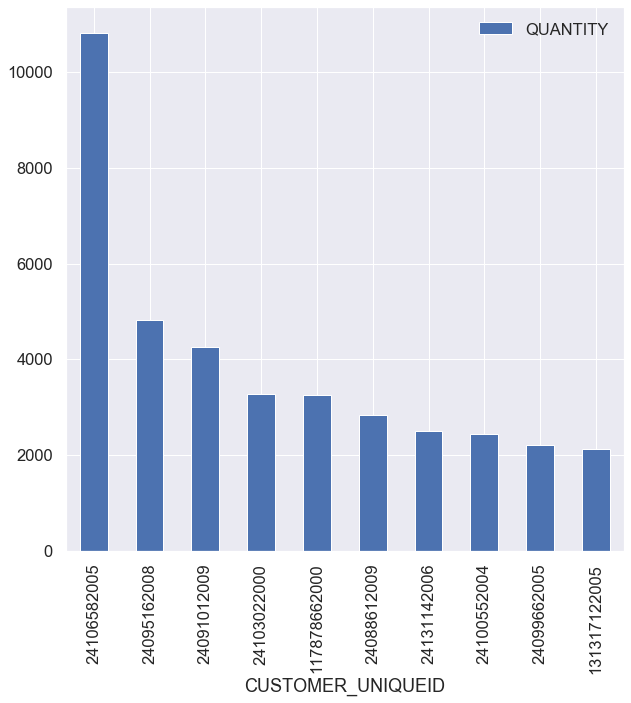

In [50]:
KF = pd.pivot_table(df, values=["QUANTITY"], index=["CUSTOMER_UNIQUEID"], aggfunc="sum").sort_values("QUANTITY", ascending=False).head(10)
KF.plot.bar(figsize=(10,10))
print(pd.DataFrame(KF.to_records()))
print(df.head())

#### Top 10 Trucks carrying most number of Wastes/Containers qty accross 88 days

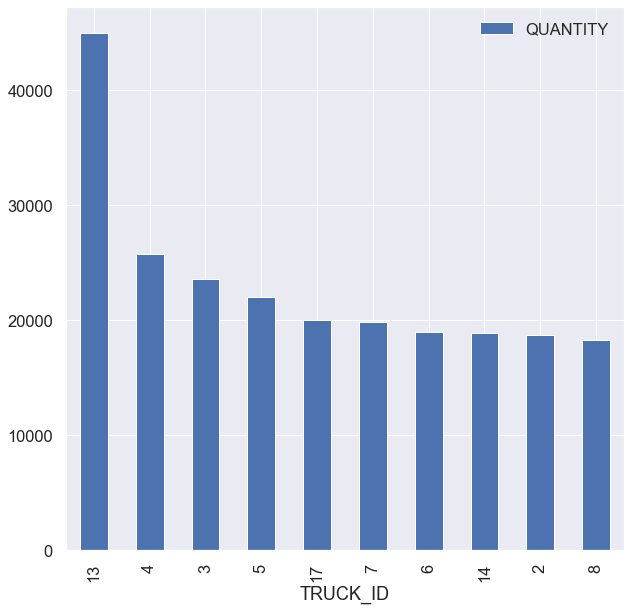

In [17]:
pd.pivot_table(df, values=["QUANTITY"], index=["TRUCK_ID"], aggfunc="sum").sort_values("QUANTITY", ascending=False).head(10).plot.bar(figsize=(10,10))

#### Top 10 Routes with most number of Wastes/Containers by qty accross 88 days

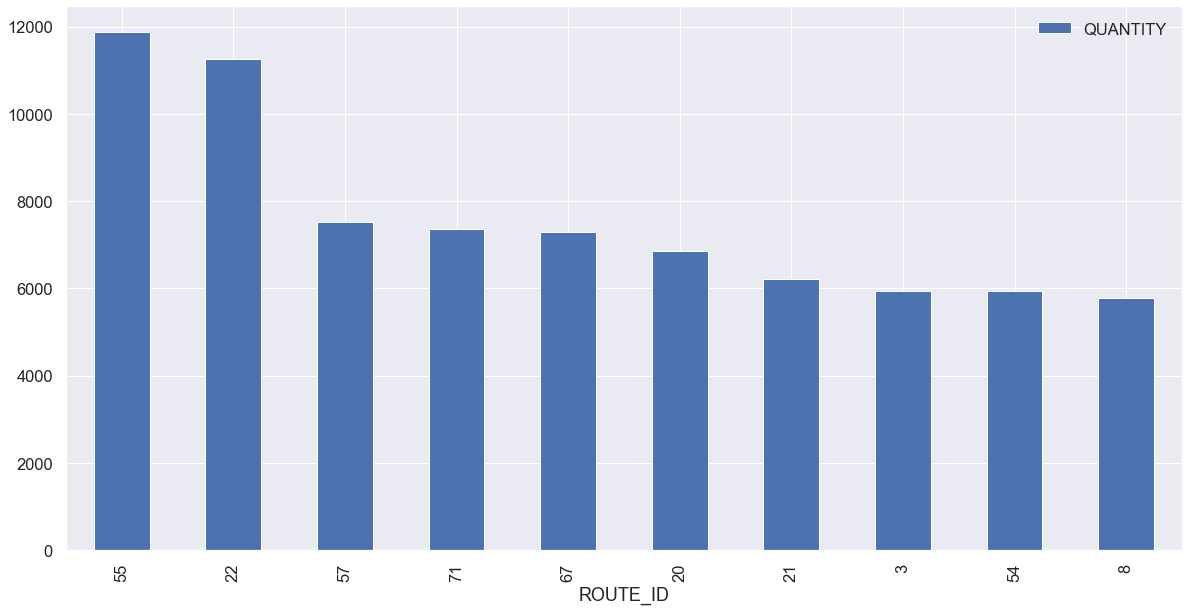

In [18]:
pd.pivot_table(df, values=["QUANTITY"], index=["ROUTE_ID"], aggfunc="sum").sort_values("QUANTITY", ascending=False).head(10).plot.bar(figsize=(20,10))

### CUSTOMERS WITH CONTAMINATED WASTE
#### _FILTER ON HOC - YES_

__HOC - Hall or Call__

In [19]:
hoc = df[df["HOC"]=="YES"].copy()

### TOP REASON FOR HOC - 
    - Overloaded Container
    - Material contaminated waste

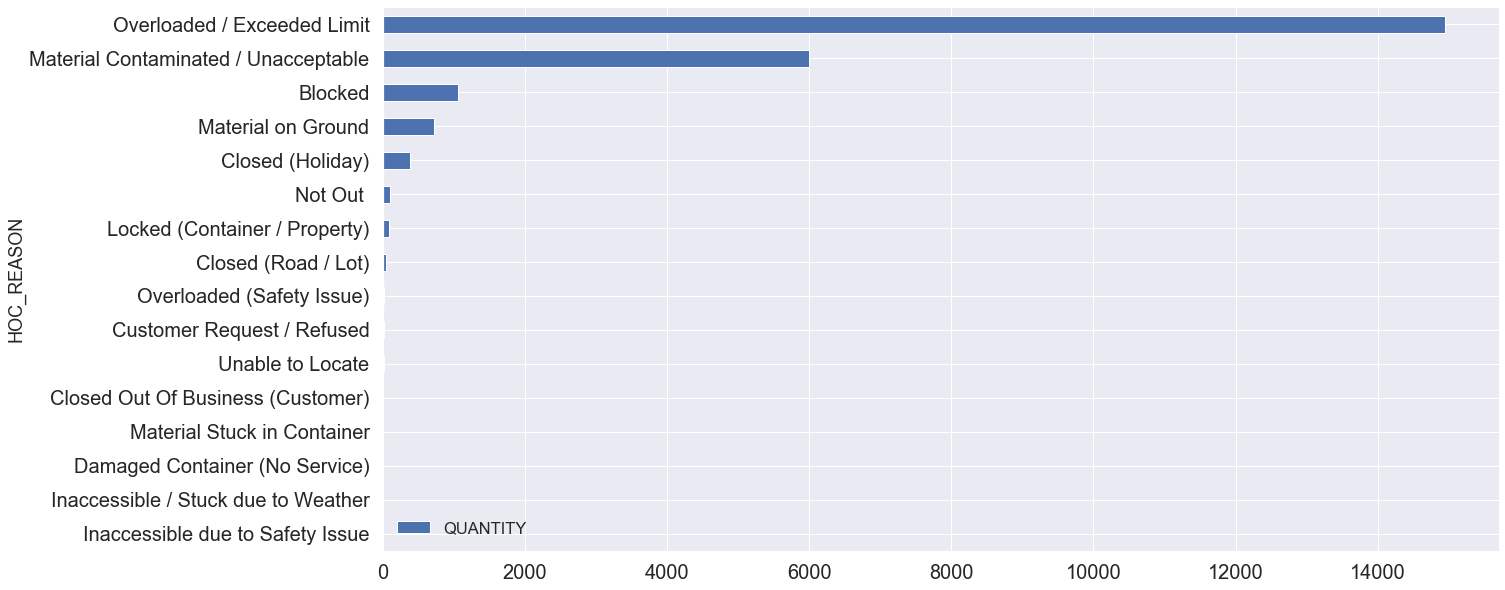

In [20]:
pd.pivot_table(hoc, values=["QUANTITY"], index=["HOC_REASON"], aggfunc="sum").sort_values("QUANTITY", ascending=True).plot.barh(figsize=(20,10), fontsize=20)

#### Service status (HOC REASON Code) at SUBLOB level 

- Commercial Frontload Recycling has the highest rejection rate

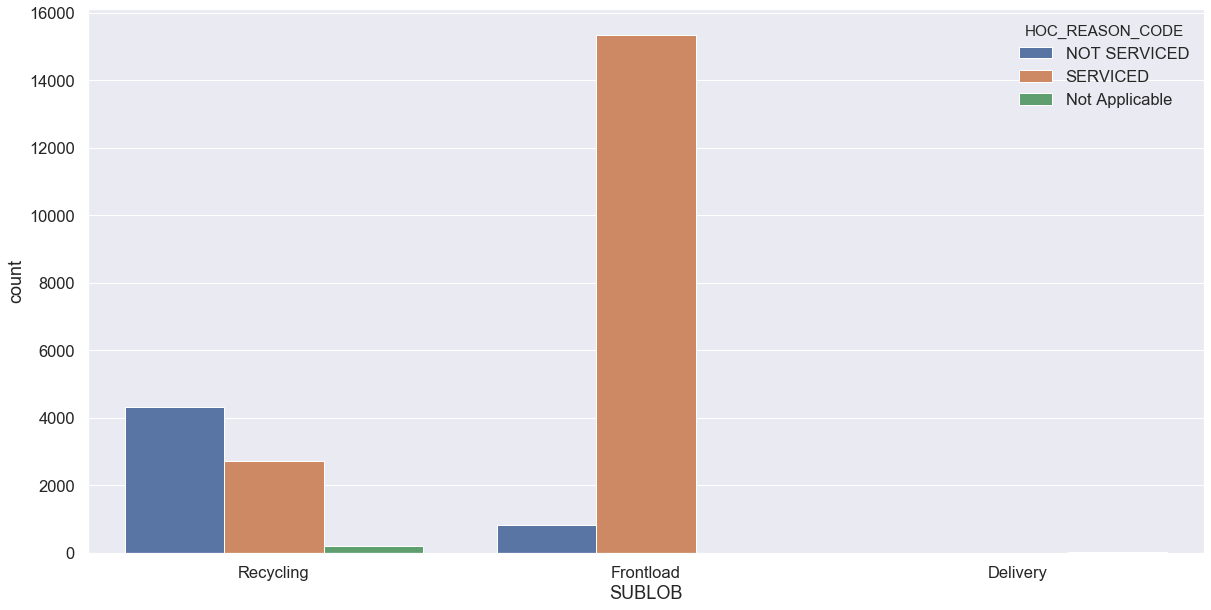

In [21]:
plt.figure(figsize=(20, 10))
sns.countplot(x="SUBLOB", hue="HOC_REASON_CODE", data=hoc)

#### Top reason for HOC - Datewise Sorted by Quantity

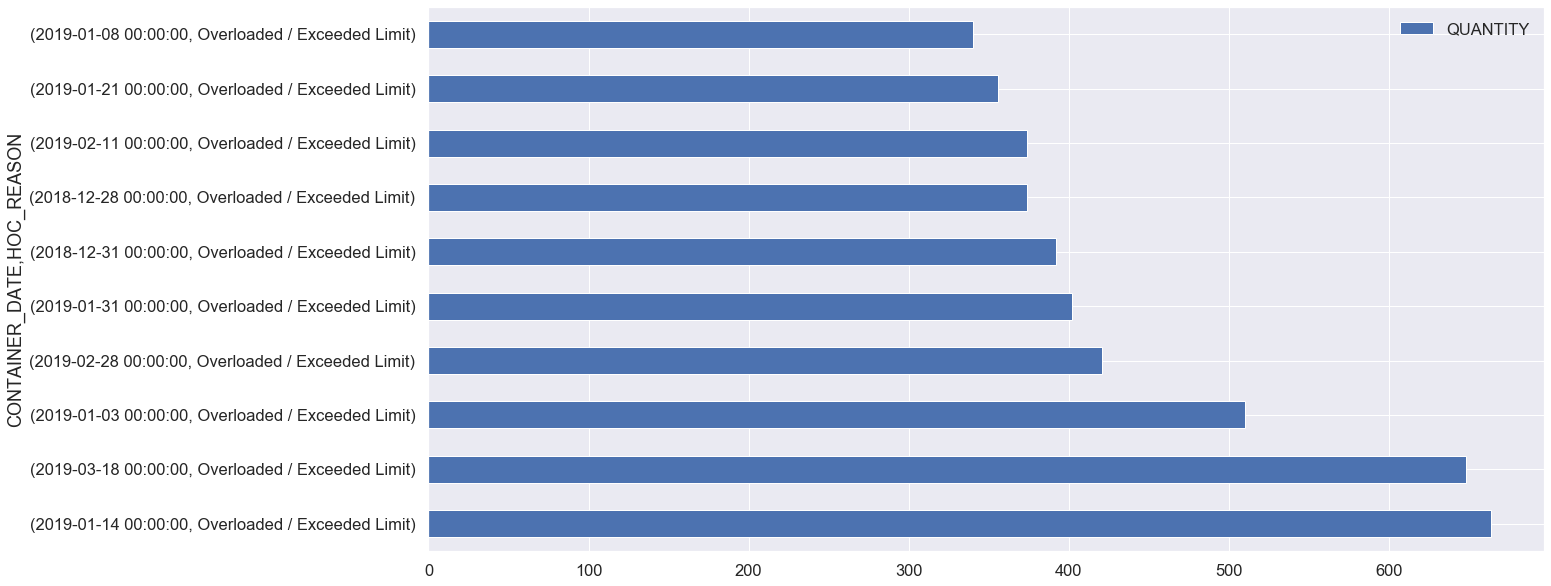

In [22]:
pd.pivot_table(hoc, values=["QUANTITY"], index=["CONTAINER_DATE", "HOC_REASON"], aggfunc="sum").sort_values("QUANTITY", ascending=False).head(10).plot.barh(figsize=(20,10))

In [23]:
hrc = pd.pivot_table(hoc, values=["QUANTITY"], index=["CONTAINER_DONE", "HOC_REASON_CODE", "ZIPCODE"], aggfunc="sum").sort_values("QUANTITY", ascending=False)

#### Top 10 Zipcodes of Waste Contamination Defaulters 

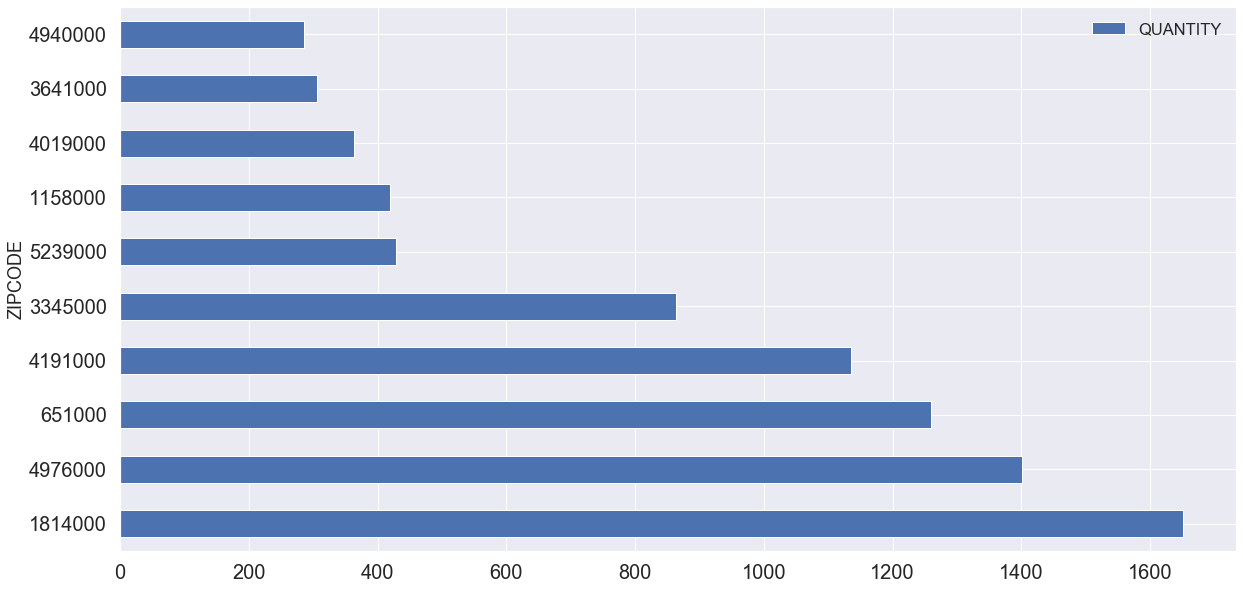

In [24]:
hrc.reset_index().groupby("ZIPCODE").sum().sort_values("QUANTITY", ascending=False).head(10).plot.barh(figsize=(20,10), fontsize=20)

#### Top 5 HOC reasons along with Quantity categorized based on SUBLOB

                                  QUANTITY                    
SUBLOB                            Delivery Frontload Recycling
HOC_REASON                                                    
Blocked                                NaN     830.0     229.0
Closed (Holiday)                       1.0     353.0      26.0
Closed (Road / Lot)                    NaN      49.0       1.0
Closed Out Of Business (Customer)      NaN       3.0       5.0
Customer Request / Refused             1.0       8.0       5.0


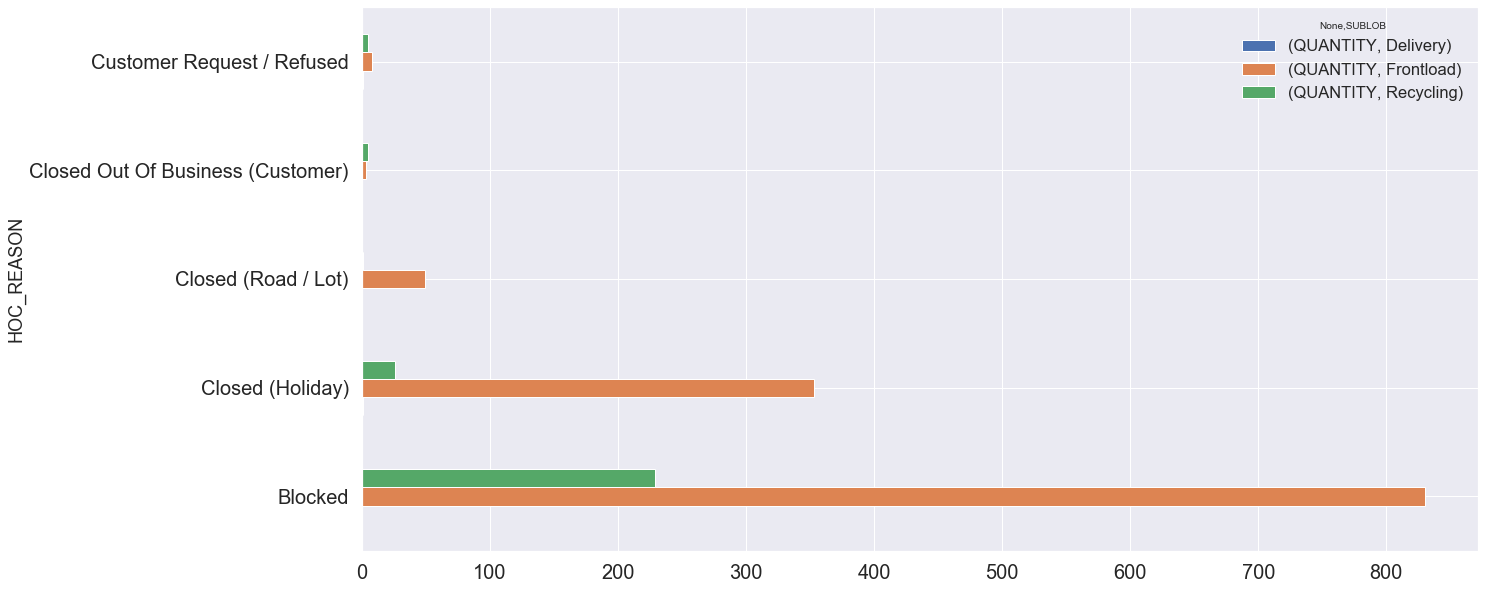

In [46]:
kf=pd.pivot_table(hoc, values=["QUANTITY"], index=["HOC_REASON"], columns=["SUBLOB"], aggfunc="sum").head()
print(kf)
kf.plot.barh(figsize=(20,10), fontsize=20)

#### Top 5 HOC Reason Code along with Quantity categorized based on SUBLOB

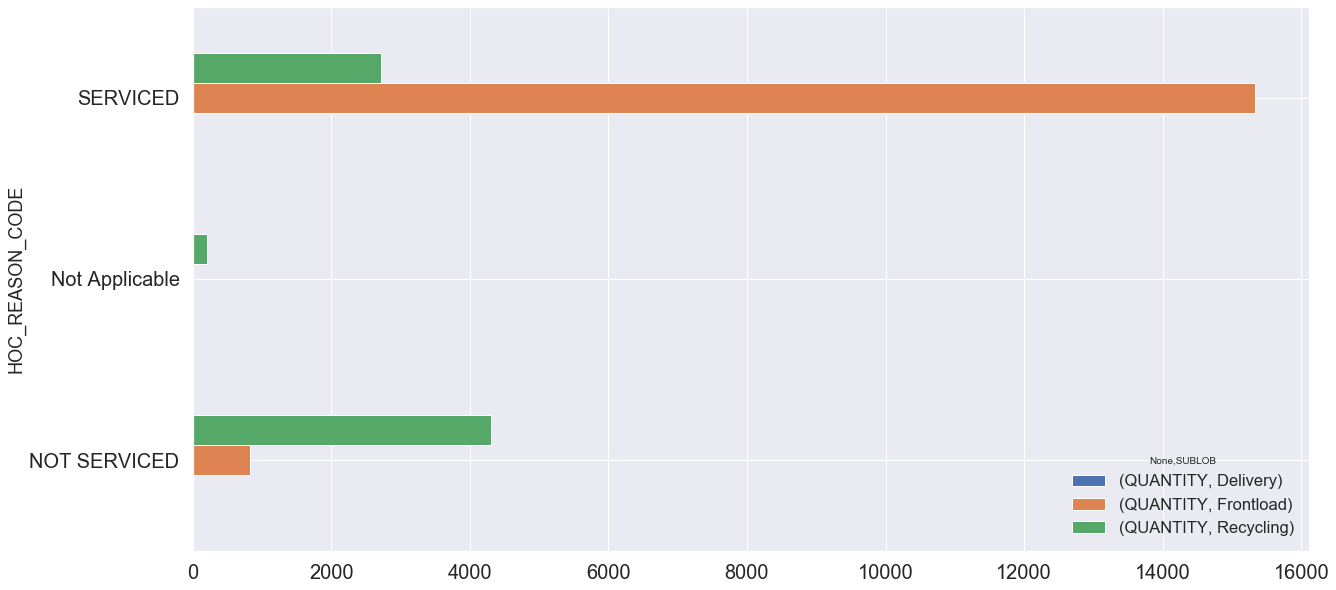

In [26]:
pd.pivot_table(hoc, values=["QUANTITY"], index=["HOC_REASON_CODE"], columns=["SUBLOB"], aggfunc="sum").head().plot.barh(figsize=(20,10), fontsize=20)

The End